In [1]:
import osmnx as ox, networkx as nx, pandas as pd, geopandas as gpd, time, matplotlib.pyplot as plt, math, ast, re
import matplotlib.cm as cm
from matplotlib.collections import PatchCollection
from descartes import PolygonPatch
from shapely.geometry import Point, Polygon, MultiPolygon
import statsmodels.api as sm, numpy as np
from geopy.distance import great_circle
from shapely.geometry import Polygon
%matplotlib inline
ox.config(use_cache=True, log_file=True, log_console=True, log_filename='analyze_stats_every_us_city',
          data_folder='G:/Geoff/osmnx/cities-usa', cache_folder='G:/Geoff/osmnx/cache/cities-usa')

In [2]:
df = pd.read_csv('stats_every_city.csv', encoding='utf-8')
df.head()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,city,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,...,self_loop_proportion,state,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,streets_per_node_counts,streets_per_node_proportion,time
0,40255362.0,40.255362,2.763230,0.035821,1.073845,Abbeville,0.043785,0.001999,268.0,0.013988,...,0.016018,AL,2279.823486,200.382357,91775.119705,458.0,2.598870,"{0: 0, 1: 86, 2: 0, 3: 239, 4: 28, 5: 1}","{0: 0.0, 1: 0.24293785310734464, 2: 0.0, 3: 0....",0.198139
1,65064935.0,65.064935,2.731586,0.028975,1.099873,Adamsville,0.042796,0.002045,461.0,0.007541,...,0.001382,AL,2375.155361,204.417102,154539.329173,756.0,2.706452,"{0: 0, 1: 159, 2: 0, 3: 332, 4: 123, 5: 5, 6: 1}","{0: 0.0, 1: 0.2564516129032258, 2: 0.0, 3: 0.5...",0.472866
2,9753292.0,9.753292,2.760518,0.021441,1.056957,Addison,0.064725,0.005696,75.0,0.046450,...,0.008197,AL,2881.893207,228.519886,28107.945963,123.0,2.543689,"{0: 0, 1: 28, 2: 0, 3: 66, 4: 9}","{0: 0.0, 1: 0.27184466019417475, 2: 0.0, 3: 0....",0.144620
3,1776164.0,1.776164,3.158854,0.040816,1.069141,Akron,0.080729,0.018392,46.0,0.085317,...,0.000000,AL,5439.459943,112.341546,9661.372929,86.0,2.812500,"{0: 0, 1: 18, 2: 0, 3: 22, 4: 24}","{0: 0.0, 1: 0.28125, 2: 0.0, 3: 0.34375, 4: 0....",0.044031
4,65079075.0,65.079075,2.713630,0.029176,1.090975,Alabaster,0.028714,0.001669,1174.0,0.002414,...,0.004440,AL,5257.144365,162.532110,342130.092407,2105.0,2.356792,"{0: 0, 1: 659, 2: 2, 3: 1036, 4: 132, 5: 3, 6: 1}","{0: 0.0, 1: 0.35951991271140205, 2: 0.00109110...",1.430981


## Inspect the stats

In [3]:
len(df)

19644

In [4]:
df.describe()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,pagerank_max_node,pagerank_min,pagerank_min_node,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,time
count,1.964100e+04,19641.000000,19641.000000,19641.000000,19640.000000,19641.000000,19641.000000,19641.000000,19641.000000,19641.000000,...,1.964100e+04,19641.000000,1.964100e+04,19641.000000,19641.000000,19641.000000,1.964100e+04,19641.000000,19641.000000,19641.000000
mean,1.670275e+07,16.702751,2.939596,0.032825,1.066565,0.047688,0.009956,323.833766,0.093362,12654.974001,...,3.320474e+08,0.005323,5.371973e+08,0.005431,6527.858626,162.408102,8.609621e+04,557.519678,2.851321,0.315136
std,1.074987e+08,107.498683,0.297472,0.141141,0.159481,0.040977,0.018016,1266.252746,0.136189,6705.181552,...,6.623097e+08,0.017803,9.422344e+08,0.015030,3434.689016,81.034774,3.310488e+05,2208.179747,0.282447,1.999200
min,3.903300e+04,0.039033,0.400000,0.000220,1.000000,0.000000,0.000000,0.000000,0.000068,5.602403,...,2.528282e+07,0.000002,3.625030e+05,0.000000,2.801202,25.821833,2.582183e+01,1.000000,1.000000,0.005993
25%,1.615906e+06,1.615906,2.769608,0.025074,1.034368,0.025926,0.002396,37.000000,0.018287,7771.499119,...,1.128357e+08,0.000547,1.192871e+08,0.000000,4006.758747,123.978936,8.892022e+03,61.000000,2.659898,0.032071
50%,3.918107e+06,3.918107,2.952785,0.029443,1.055267,0.040181,0.004927,83.000000,0.052474,11814.329656,...,1.642341e+08,0.001794,1.810832e+08,0.000000,6109.256439,145.479249,2.100479e+04,140.000000,2.851852,0.067860
75%,1.158637e+07,11.586369,3.146242,0.033951,1.082259,0.058511,0.010528,234.000000,0.117647,16583.405166,...,2.120218e+08,0.004975,2.353952e+08,0.006623,8581.340691,175.637691,6.126310e+04,398.000000,3.049663,0.205166
max,7.434258e+09,7434.257623,3.734722,9.357215,20.452465,1.000000,0.524196,62996.000000,2.666667,58603.420737,...,4.506679e+09,0.500000,4.502370e+09,1.000000,29301.710368,3036.956693,1.534801e+07,107393.000000,4.000000,204.592024


In [5]:
df[['state', 'city', 'time', 'streets_per_node_avg', 'n', 'm', 'circuity_avg']].sort_values(by='m', ascending=False).head()

,state,city,time,streets_per_node_avg,n,m,circuity_avg
17191,TX,Houston,204.592024,3.053950,71993.0,176161.0,1.054423
1437,CA,Los Angeles,67.755900,2.945221,52210.0,144445.0,1.048552
11846,NY,New York,47.588840,3.321207,54236.0,142424.0,1.021721
658,AZ,Phoenix,59.881315,2.793347,46237.0,119574.0,1.075627
17666,TX,San Antonio,45.030600,2.925708,37272.0,96376.0,1.058283


In [6]:
df.groupby('state').median().describe()

,area,area_km,avg_neighbor_degree_avg,avg_weighted_neighbor_degree_avg,circuity_avg,clustering_coefficient_avg,clustering_coefficient_weighted_avg,count_intersections,degree_centrality_avg,edge_density_km,...,pagerank_max_node,pagerank_min,pagerank_min_node,self_loop_proportion,street_density_km,street_length_avg,street_length_total,street_segments_count,streets_per_node_avg,time
count,5.100000e+01,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,5.100000e+01,51.000000,5.100000e+01,51.000000,51.000000,51.000000,5.100000e+01,51.000000,51.000000,51.000000
mean,1.657391e+07,16.573913,2.925059,0.029878,1.060731,0.042414,0.004730,402.578431,0.048121,11692.299113,...,1.496950e+08,0.001746,1.521983e+08,0.002249,6092.454577,150.069738,9.602515e+04,692.558824,2.822541,0.395783
std,2.989866e+07,29.898662,0.138724,0.003215,0.014372,0.007252,0.001985,1324.301810,0.031421,3998.437500,...,8.268978e+07,0.001304,8.363940e+07,0.003754,2164.362681,23.868823,2.832585e+05,2306.268370,0.171668,1.430218
min,1.070451e+06,1.070451,2.673759,0.023035,1.035426,0.028034,0.001803,26.000000,0.000549,1052.176568,...,3.877861e+07,0.000015,3.955119e+07,0.000000,526.088284,110.345932,9.254807e+03,47.000000,2.419539,0.029021
25%,2.782724e+06,2.782724,2.819577,0.027646,1.049946,0.037638,0.003377,63.000000,0.028306,8767.069848,...,1.007524e+08,0.000925,1.034453e+08,0.000000,4621.954102,131.433065,1.526220e+04,106.500000,2.708833,0.057434
50%,5.069211e+06,5.069211,2.909800,0.030193,1.060012,0.041096,0.004701,87.000000,0.048650,12099.179959,...,1.466061e+08,0.001646,1.469866e+08,0.000000,6247.199012,145.176706,2.367906e+04,146.000000,2.799242,0.068367
75%,1.219045e+07,12.190452,2.990410,0.031832,1.070577,0.045286,0.005846,141.000000,0.062669,14215.053001,...,1.860464e+08,0.002167,1.898499e+08,0.003171,7272.404097,166.093533,4.137854e+04,240.500000,2.915817,0.137592
max,1.583650e+08,158.364992,3.238562,0.040127,1.102221,0.071002,0.009912,9330.000000,0.120513,21355.016667,...,5.816619e+08,0.005271,5.824309e+08,0.020284,12561.028196,223.502923,1.989227e+06,16275.000000,3.262517,10.149165


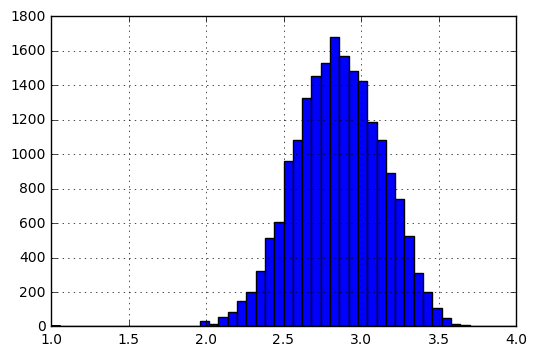

In [7]:
df['streets_per_node_avg'].hist(bins=50)

In [8]:
df_plot = df.dropna(subset=['n'])

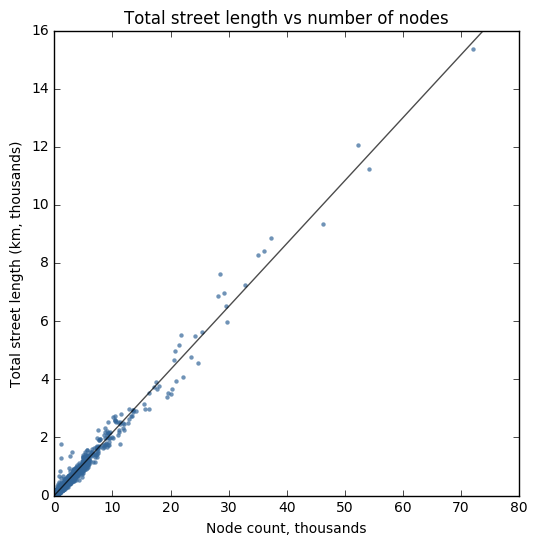

In [9]:
fig, ax = plt.subplots(figsize=(6, 6))
x = df_plot['n'] / 1000
y = df_plot['street_length_total'] / 1000 / 1000

xlim = [0, math.ceil(x.max()/10)*10] #round to nearest greater 100
ylim = [0, math.ceil(y.max()/2)*2] #round to nearest greater 20

# regress y on x
results = sm.OLS(y, sm.add_constant(x)).fit()

# calculate estimated y values for regression line
x_line = pd.Series(xlim)
y_est = x_line * results.params[1] + results.params[0]

# draw regression line and scatter plot the points
ax.plot(x_line, y_est, c='k', alpha=0.7, linewidth=1, zorder=1)
ax.scatter(x=x, y=y, c='#336699', linewidths=0, alpha=0.7, s=10)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
#ax.set_xlim((0,15000))
#ax.set_ylim((0,3000))

ax.set_title('Total street length vs number of nodes')
ax.set_xlabel('Node count, thousands')
ax.set_ylabel('Total street length (km, thousands)')

fig.savefig(filename='images/street-length-vs-nodes', dpi=300, bbox_inches='tight')
plt.show()

In [10]:
print('r-squared:', round(results.rsquared, 2))
results.params

r-squared: 0.98


const   -0.000736
n        0.216720
dtype: float64

In [11]:
cols = ['area_km', 'avg_neighbor_degree_avg',
       'avg_weighted_neighbor_degree_avg', 'circuity_avg',
       'clustering_coefficient_avg', 'clustering_coefficient_weighted_avg',
       'count_intersections', 'degree_centrality_avg', 'edge_density_km',
       'edge_length_avg', 'edge_length_total', 'geoid',
       'int_1_streets_prop', 'int_3_streets_prop', 'int_4_streets_prop', 'intersection_density_km',
       'k_avg', 'm', 'n', 'city', 'node_density_km', 'pagerank_max',
       'pagerank_min',
       'self_loop_proportion', 'street_density_km', 'street_length_avg',
       'street_length_total', 'street_segments_count', 'streets_per_node_avg', 'city']
summary = df[cols]
summary = summary.describe().T.drop(['count', '25%', '75%'], axis=1).applymap(lambda x: round(x, 3))
summary.to_csv('summary.csv', encoding='utf-8')

In [12]:
df.groupby('state')['streets_per_node_avg'].median().sort_values()

state
HI    2.419539
AK    2.434783
VT    2.554217
VA    2.629213
AL    2.640000
NC    2.645752
WV    2.666667
ME    2.668168
KY    2.678707
NH    2.686885
OR    2.694444
CT    2.702813
UT    2.708333
TN    2.709334
CA    2.739154
WA    2.750000
MS    2.750000
NY    2.753012
MA    2.763441
AZ    2.770642
NV    2.770710
AR    2.776573
GA    2.776699
MD    2.789474
LA    2.793978
DE    2.799242
OH    2.800000
SC    2.809384
WI    2.812500
RI    2.859369
FL    2.865261
MN    2.866667
PA    2.867925
NJ    2.881188
CO    2.883019
MO    2.887218
MI    2.897590
ID    2.914474
TX    2.917160
WY    2.923527
IL    2.925926
NM    2.929577
IN    2.929936
IA    3.018031
OK    3.034437
ND    3.068966
MT    3.105263
SD    3.121951
KS    3.139698
NE    3.156250
DC    3.262517
Name: streets_per_node_avg, dtype: float64

In [13]:
df.columns

Index(['area', 'area_km', 'avg_neighbor_degree_avg',
       'avg_weighted_neighbor_degree_avg', 'circuity_avg', 'city',
       'clustering_coefficient_avg', 'clustering_coefficient_weighted_avg',
       'count_intersections', 'degree_centrality_avg', 'edge_density_km',
       'edge_length_avg', 'edge_length_total', 'geoid', 'int_0_streets_count',
       'int_0_streets_prop', 'int_10_streets_count', 'int_10_streets_prop',
       'int_11_streets_count', 'int_11_streets_prop', 'int_1_streets_count',
       'int_1_streets_prop', 'int_2_streets_count', 'int_2_streets_prop',
       'int_3_streets_count', 'int_3_streets_prop', 'int_4_streets_count',
       'int_4_streets_prop', 'int_5_streets_count', 'int_5_streets_prop',
       'int_6_streets_count', 'int_6_streets_prop', 'int_7_streets_count',
       'int_7_streets_prop', 'int_8_streets_count', 'int_8_streets_prop',
       'int_9_streets_count', 'int_9_streets_prop', 'intersection_density_km',
       'k_avg', 'm', 'n', 'node_density_km', 'p

In [14]:
# node and edge density per km are hard to interpret when using municipal boundaries
# as municipal boundaries vary greatly in their extents around the built-up area
by_state = df.groupby('state')[['intersection_density_km', 
                     'streets_per_node_avg', 
                     'circuity_avg',
                     'street_length_avg']].median().sort_values(by='intersection_density_km').applymap(lambda x: round(x, 2))
by_state.sort_index().to_csv('by_state.csv', encoding='utf-8')
by_state.sort_index()

,intersection_density_km,streets_per_node_avg,circuity_avg,street_length_avg
state,,,,
AK,1.28,2.43,1.10,223.50
AL,9.70,2.64,1.07,190.81
AR,15.75,2.78,1.06,166.32
AZ,12.45,2.77,1.08,171.80
CA,32.58,2.74,1.07,143.79
CO,29.26,2.88,1.06,136.68
CT,28.05,2.70,1.07,165.87
DC,58.91,3.26,1.04,122.23
DE,25.30,2.80,1.06,127.80


In [15]:
variable = 'streets_per_node_avg'
df[df['state']=='NE'][[variable, 'city']].sort_values(by=variable)

,streets_per_node_avg,city
10821,2.454545,Nenzel
10826,2.475410,Niobrara
10573,2.533333,Cedar Creek
10699,2.562500,Hallam
10622,2.564706,Decatur
10858,2.576923,Panama
10799,2.625000,Merriman
10736,2.636364,Hyannis
10597,2.666667,Cornlea
10720,2.666667,Hickman


## Distribution of street segment lengths

Tends to follow approx lognormal distribution in most cities with a variety of streets. Show one example here.

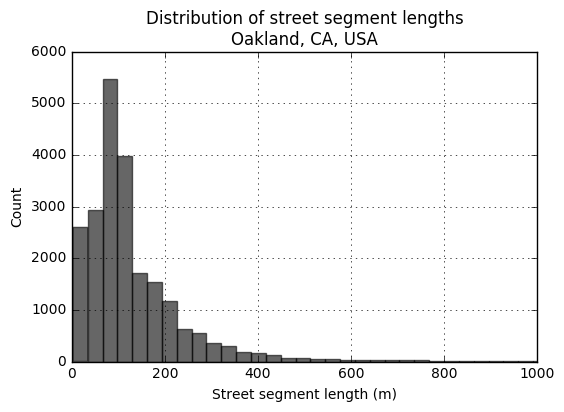

In [16]:
query = 'Oakland, CA, USA'
G = ox.graph_from_place(query, network_type='drive')
lengths = [data['length'] for u, v, key, data in G.edges(keys=True, data=True)]
ax = pd.Series(lengths).hist(bins=100, fc='k', alpha=0.6)
ax.set_xlim((0, 1000))
ax.set_xlabel('Street segment length (m)')
ax.set_ylabel('Count')
ax.set_title('Distribution of street segment lengths\n{}'.format(query))
plt.show()